In [143]:
import cv2
import matplotlib.pyplot as plt 
import os
import numpy as np
import math

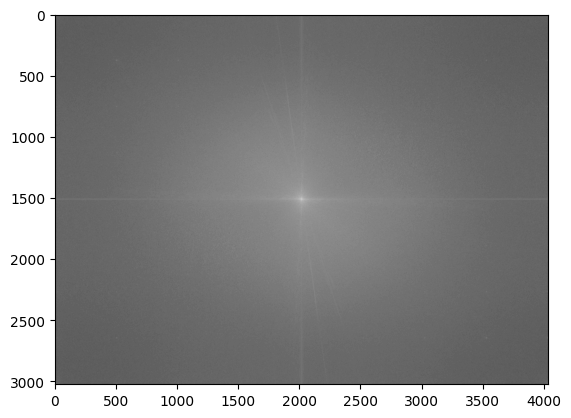

In [150]:
img = cv2.imread('data/IMG_1460.jpeg', 0)
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
magnitude_spectrum = np.log(np.abs(fshift))

plt.imshow(magnitude_spectrum, cmap = 'gray')

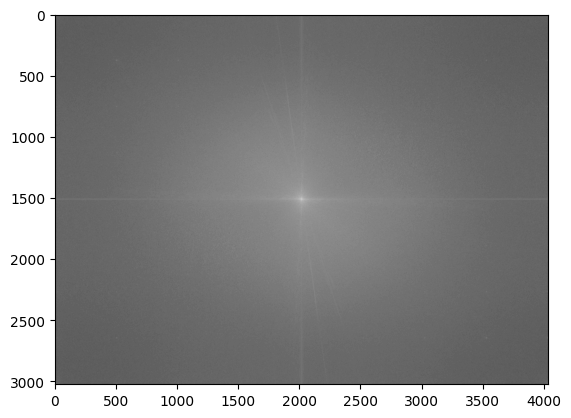

In [151]:
rows, cols = img.shape
crow,ccol = int(rows/2) , int(cols/2)
kr = 0 
kc = 0
fshift[crow-kr:crow+kr, ccol-kc:ccol+kc] = 0

plt.imshow(np.log(np.abs(fshift)), cmap = 'gray')

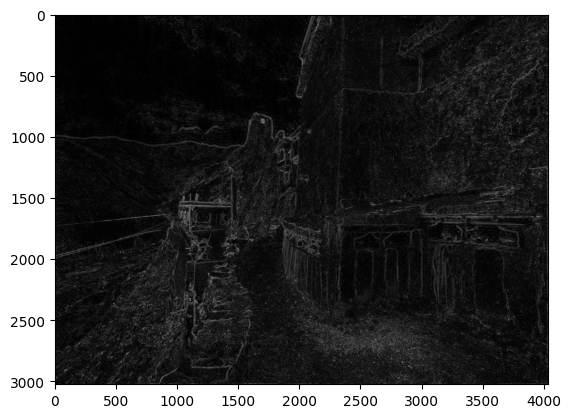

In [152]:
rows, cols = img.shape
crow,ccol = int(rows/2) , int(cols/2)
kr = int(0.02*rows)
kc = int(0.02*cols)
fshift[crow-kr:crow+kr, ccol-kc:ccol+kc] = 0

f_ishift = np.fft.ifftshift(fshift)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)

plt.imshow(img_back, cmap = 'gray')

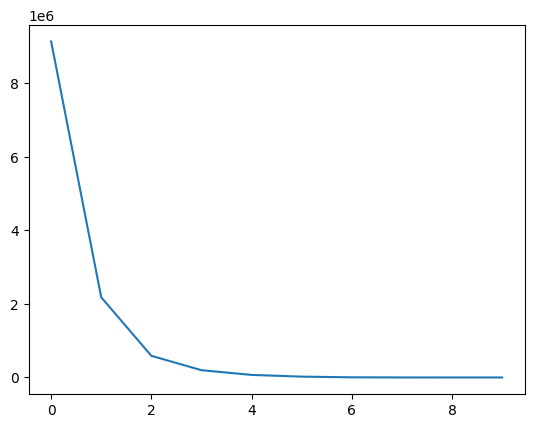

In [153]:
# Convert magnitude spectrum to image 
img = cv2.normalize(magnitude_spectrum, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)

img_back = cv2.normalize(img_back, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)

hist256 = cv2.calcHist([img_back], [0], None, [256], [0, 256])
hist10  = cv2.calcHist([img_back], [0], None, [10], [0, 256])

plt.plot(hist10)

In [154]:
hist10_probs = hist10 / np.sum(hist10)
benford_probs = np.log10(1 + 1 / np.arange(1, 10))

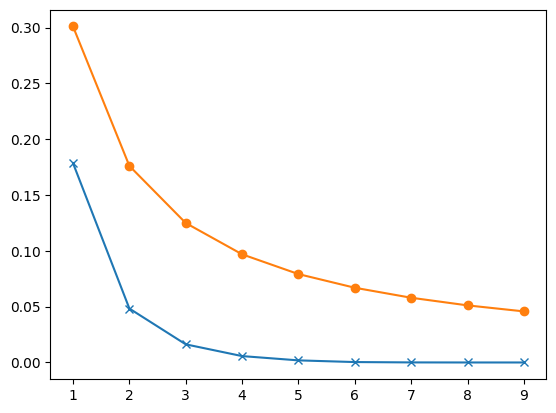

In [155]:
plt.plot(range(1,10), hist10_probs[1:10], 'x-')
plt.plot(range(1,10), benford_probs, 'o-')

# Set x ticks 
# plt.xticks(range(0,10))

In [207]:
def fourier_transform_hist(file, scl, pct=0.02):
    img = cv2.imread(file, 0)
    f = np.fft.fft2(img)
    fshift = np.fft.fftshift(f)
    magnitude_spectrum = np.log(np.abs(fshift))
    
    rows, cols = img.shape
    crow,ccol = int(rows/2) , int(cols/2)
    kr = int(pct*rows)
    kc = int(pct*cols)
    fshift[crow-kr:crow+kr, ccol-kc:ccol+kc] = 0

    f_ishift = np.fft.ifftshift(fshift)
    img_back = np.fft.ifft2(f_ishift)
    img_back = np.abs(img_back)

    mag_spectrum = cv2.normalize(magnitude_spectrum, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)

    img_back = cv2.normalize(img_back, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)

    hist256 = cv2.calcHist([img_back], [0], None, [256], [0, 256])
    hist10  = cv2.calcHist([img_back], [0], None, [10], [0, 256])
    
    hist10_probs = hist10 / np.sum(hist10)
    benford_probs = np.log10(1 + 1 / np.arange(1, 10))
    
    return {"img": img, "mag": mag_spectrum, "shift": fshift_img, "xform": img_back, "hist10": hist10_probs, "ben": benford_probs}

(<Figure size 2000x300 with 5 Axes>,
 array([<AxesSubplot: title={'center': 'Original'}>,
        <AxesSubplot: title={'center': 'Magnitude Spectrum'}>,
        <AxesSubplot: title={'center': 'Mask'}>,
        <AxesSubplot: title={'center': 'Fourier Transform'}>,
        <AxesSubplot: title={'center': 'Histogram'}>], dtype=object))

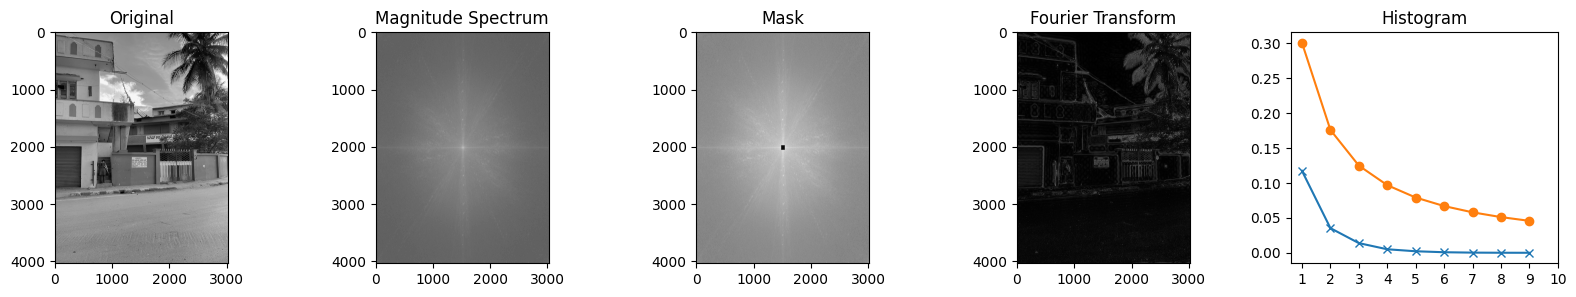

In [208]:
def plot_analysis(analysis):
    fig, ax = plt.subplots(1, 5, figsize=(20, 3), gridspec_kw={'width_ratios': [1, 1, 1, 1, 1]})
    ax[0].imshow(analysis['img'], cmap = 'gray')
    ax[0].set_title('Original')
    ax[1].imshow(analysis['mag'], cmap = 'gray')
    ax[1].set_title('Magnitude Spectrum')
    ax[2].imshow(analysis['shift'], cmap = 'gray')
    ax[2].set_title('Mask')
    ax[3].imshow(analysis['xform'], cmap = 'gray')
    ax[3].set_title('Fourier Transform')
    ax[4].plot(range(1,10), analysis['hist10'][1:10], 'x-')
    ax[4].plot(range(1,10), analysis['ben'], 'o-')
    ax[4].set_xticks(range(1,11))
    ax[4].set_title('Histogram')

    return fig, ax

plot_analysis(fourier_transform_hist('data/IMG_0331.jpeg', 0.5, 0.01))

In [171]:
jpeg_files = [f for f in os.listdir('data') if f.endswith('.jpeg') or f.endswith('.jpg')]
len(jpeg_files)



246